# AI 221: Machine Exercise 4

### 8x8 Handwritten Digits Visualization and Classification

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, \
cross_val_score
from sklearn.svm import SVC
import scipy.stats as stats
from time import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Load the `load_digits` data from sklearn.datasets.


In [2]:
digits = datasets.load_digits()
X, y = digits.data, digits.target
target_names = digits.target_names
print(X.shape, y.shape)

(1797, 64) (1797,)


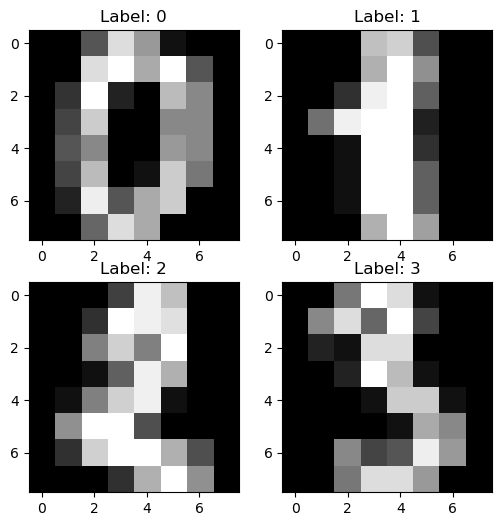

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap=plt.cm.gray)
    ax.set_title(f"Label: {y[i]}")

### a.

**Using PCA, visualize the projection of the data set onto the first 2 principal components. In the plot, color the points based on their class label**

It took 0.02 seconds


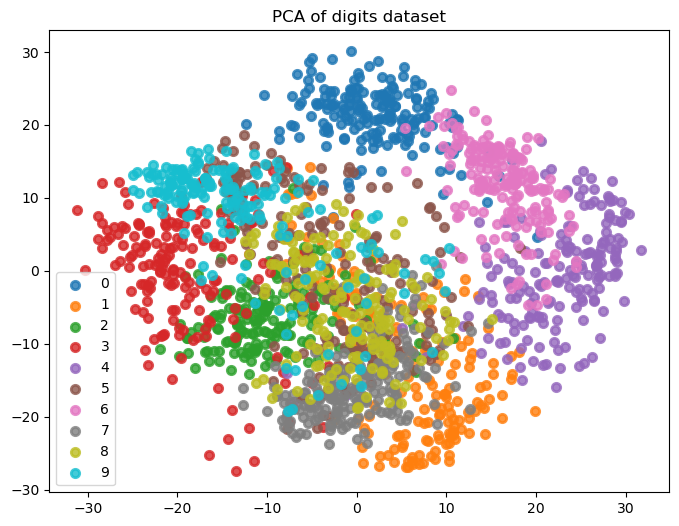

In [4]:
start = time()
n_classes = len(target_names)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
print(f"It took {time() - start:.2f} seconds")
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_names[i],
                alpha=0.8, lw=2)
plt.legend(loc="best", shadow=False)
plt.title("PCA of digits dataset")
plt.show()


**Generate the explained_variance_ratio plot (or CPV plot) of the data**

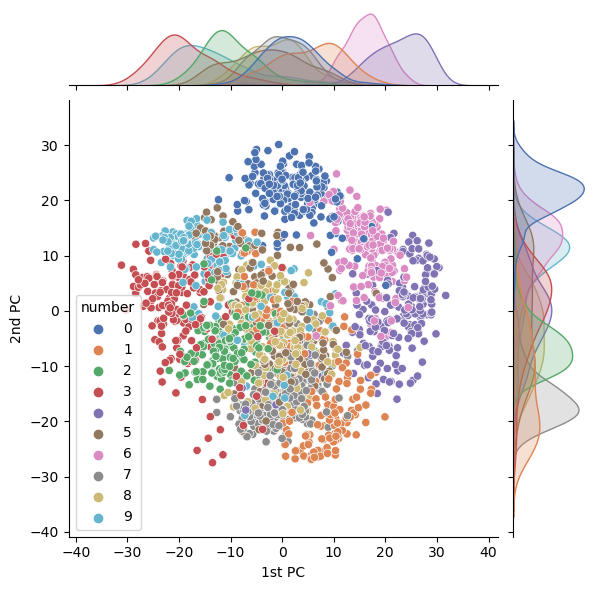

In [5]:
df = pd.DataFrame({"1st PC": X_pca[:, 0], "2nd PC": X_pca[:, 1], "number": y})
sns.jointplot(data=df, x="1st PC", y="2nd PC", hue="number", palette='deep')
plt.show()

**CPV at 2 PCs**

In [6]:
var = pca.explained_variance_ratio_
print(f"Explained variance ratio:    {str(var)}")
print(f"Cumulative percent variance: {str(np.cumsum(var)*100)}")

Explained variance ratio:    [0.14890594 0.13618771]
Cumulative percent variance: [14.89059358 28.50936482]


### b.

**Split the data into 70% Training and 30% Testing with stratification. Use random_state=0 in the train_test_split function.**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, stratify=y, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1257, 2) (1257,)
(540, 2) (540,)


**Train an SVM with hyper-parameter tuning scheme.**

In [8]:
param_random = {"C": stats.expon(scale=1), 
              "gamma": stats.expon(scale=0.01),
              "kernel": ["rbf", "linear", "sigmoid"]}
max_iter = 20
random_search = RandomizedSearchCV(SVC(), param_random, n_iter=max_iter, cv=5, random_state=0)
start = time()
random_search.fit(X_train, y_train)
print(f"Search took {time() - start:.2f} seconds for "
      f"{len(random_search.cv_results_['params'])} candidate parameter settings.")
print(random_search.best_params_)

Search took 10.32 seconds for 20 candidate parameter settings.
{'C': 0.8723211970403807, 'gamma': 0.007708346610991595, 'kernel': 'rbf'}


**Report the classification accuracy and confusion matrix for both the Training and Test sets based on the best tuned model**

In [9]:
def display_metrics(model, X_sample, y_sample):
    grid_predictions = model.predict(X_sample)
    print(classification_report(y_sample, grid_predictions))
    cfm = confusion_matrix(y_sample, grid_predictions)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels=target_names)
    cm_display.plot()
    plt.title("Confusion Matrix")
    plt.show()
    return

Training set

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       124
           1       0.73      0.55      0.63       127
           2       0.74      0.71      0.72       124
           3       0.83      0.70      0.76       128
           4       0.87      0.91      0.89       127
           5       0.38      0.20      0.27       127
           6       0.82      0.86      0.84       127
           7       0.67      0.82      0.73       125
           8       0.37      0.64      0.47       122
           9       0.69      0.65      0.67       126

    accuracy                           0.69      1257
   macro avg       0.70      0.69      0.69      1257
weighted avg       0.70      0.69      0.69      1257



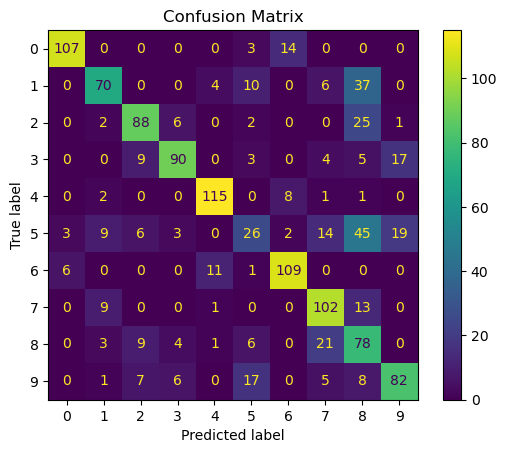

In [10]:
display_metrics(random_search, X_train, y_train)

Test set

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.65      0.44      0.52        55
           2       0.69      0.68      0.69        53
           3       0.70      0.60      0.65        55
           4       0.88      0.80      0.83        54
           5       0.33      0.16      0.22        55
           6       0.81      0.89      0.85        54
           7       0.49      0.78      0.60        54
           8       0.28      0.40      0.33        52
           9       0.62      0.61      0.62        54

    accuracy                           0.63       540
   macro avg       0.64      0.63      0.62       540
weighted avg       0.64      0.63      0.62       540



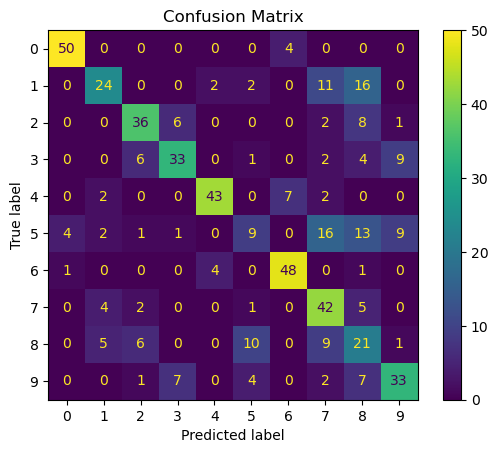

In [11]:
display_metrics(random_search, X_test, y_test)

### c.

**Perform LDA with 2 components on the original 64-feature data set. Split the data into 70%-30% training/testing with stratification and random_state=0.**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1257, 64) (1257,)
(540, 64) (540,)


In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)
start = time()
X_train_lda= lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
print(f"It took {time() - start:.2f} seconds")

It took 0.03 seconds


**Plot the projected data in 2-D space with colors corresponding to their class labels; use a circle marker for training data, then x marker for test data**

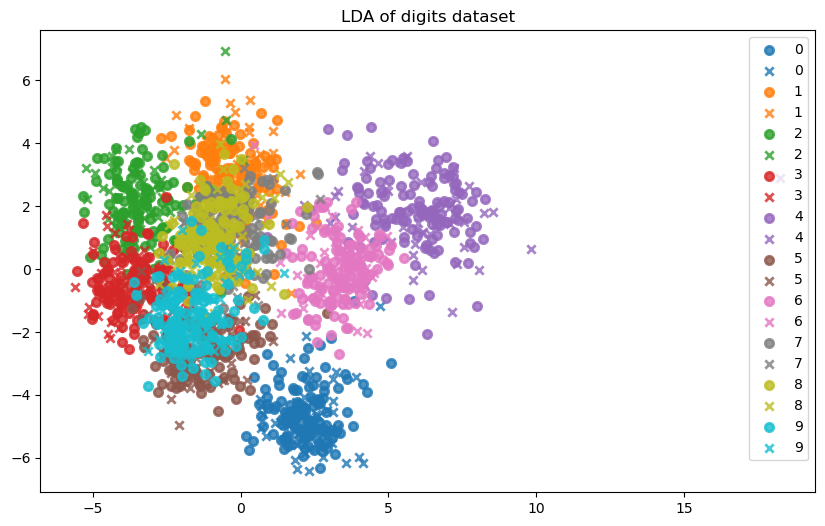

In [14]:
plt.figure(figsize=(10, 6))
cmap = mpl.colormaps["tab10"]
for i in range(n_classes):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], label=target_names[i],
                c=[cmap(i)], alpha=0.8, lw=2)
    plt.scatter(X_test_lda[y_test == i, 0], X_test_lda[y_test == i, 1], label=target_names[i],
                c=[cmap(i)], alpha=0.8, lw=2, marker="x")
plt.legend(loc="best", shadow=False)
plt.title("LDA of digits dataset")
plt.show()

**Report the classification accuracy and confusion matrix for both Training and Test sets based on the LDA predictions.**

Training set

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.95      0.95      0.95       127
           2       0.99      0.98      0.99       124
           3       0.98      0.94      0.96       128
           4       1.00      0.98      0.99       127
           5       0.97      0.95      0.96       127
           6       0.98      0.99      0.99       127
           7       0.98      0.98      0.98       125
           8       0.91      0.93      0.92       122
           9       0.88      0.94      0.91       126

    accuracy                           0.96      1257
   macro avg       0.96      0.96      0.96      1257
weighted avg       0.96      0.96      0.96      1257



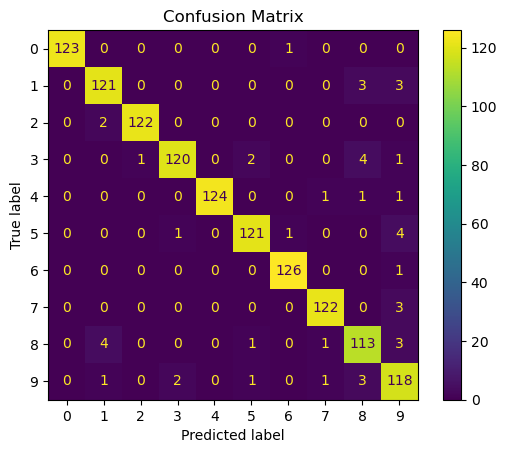

In [15]:
display_metrics(lda, X_train, y_train)

Test set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.87      0.96      0.91        55
           2       1.00      0.96      0.98        53
           3       0.94      0.93      0.94        55
           4       1.00      0.94      0.97        54
           5       0.96      0.96      0.96        55
           6       1.00      0.96      0.98        54
           7       1.00      1.00      1.00        54
           8       0.89      0.92      0.91        52
           9       0.94      0.94      0.94        54

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



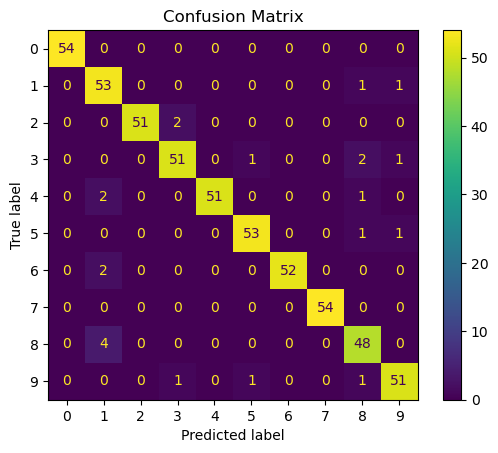

In [16]:
display_metrics(lda, X_test, y_test)

**Which of the two methods (PCA+SVM vs. LDA) is more preferrable for the 8x8 Handwritten Digits classification? Use various aspects for comparison such as computational effort, human effort, model accuracy, interpretability, etc.**

- PCA+SVM requires more computational effort than LDA. The PCA+SVM uses random search for hyperparameter tuning which evaluates 20 different combinations to find the optimal values. This in turn increased the time it took for the classification task. Although it only took 0.02 to perform PCA, evaluating 20 models with SVM took 10.32 second. SVM also does not scale very well with increasing number of samples. Because LDA, does not have many parameters that is tuned, a straighforward LDA implementation that only took 0.03 seconds was used.
- The human effort required to perform PCA+SVM is considerably greater because of the number of steps needed to take. Although random search automatically choose the best hyperparameters among the tested models, the scale of the values still needs to be changed to make sure that it covers the optimal ones. The number of iteration should also be decided by the user. In comparison, LDA is just a few lines of code and few adjustments are done.
- In this particular problem, LDA is much more accurate than PCA+SVM. It can be seen that the 2 principal compenents of the digits datasent only captures about 28.51% of the variance resulting in a lower accuracy model both and training (0.69) and test (0.63) set. LDA provided a much more desirable result with both training and test set accuracy at 0.96.
- LDA is explicitly designed for maximizing class separability, making it highly interpretable for classification tasks. PCA on the other hand, is designed for dimensionality reduction which may not have intuitive meanings.
- Overall, LDA is more preferable for the 8x8 Handwritten Digits classification based on less computational effort, less human effort, greater model accuracy, and better interpretability